In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [16]:
llama = pd.read_csv('1-21_manual_eval_llama.csv')
mini = pd.read_csv('1-21_manual_eval_mini.csv')
reg = pd.read_csv('1-21_manual_eval_regular.csv')

llama_df = pd.DataFrame(llama)
mini_df = pd.DataFrame(mini)
regular_df = pd.DataFrame(reg)
all_dfs = [llama_df, regular_df, mini_df]
new_merged = pd.concat(all_dfs).reset_index(drop=True)

prelim_merged = pd.read_csv('../../responses/merged_manual_eval.csv')

prelim_merged = prelim_merged.drop([col for col in prelim_merged.columns if col.endswith('_full')], axis=1)

new_column_names = {}
for col in prelim_merged.columns:
    if col.startswith('manual_interpret'):
        new_column_names[col] = col.replace('manual_interpret', 'Interpret_rating_manual')
    elif col.startswith('manual_create'):
        new_column_names[col] = col.replace('manual_create', 'Create_rating_manual')
    elif col.startswith('manual_translate'):
        new_column_names[col] = col.replace('manual_translate', 'Translate_rating_manual')
    elif col.startswith('manual_generate'):
        new_column_names[col] = col.replace('manual_generate', 'Generate_rating_manual')

prelim_merged.rename(columns=new_column_names, inplace=True)

prelim_llama = prelim_merged.loc[prelim_merged['model_name'] == 'llama']
prelim_mini = prelim_merged.loc[prelim_merged['model_name'] == 'mini']
prelim_reg = prelim_merged.loc[prelim_merged['model_name'] == 'reg']


In [17]:
rating_map = {'EXCELLENT': 4, 'GOOD': 3, 'OKAY': 2, 'BAD': 1}
model_names = ['llama', 'regular', 'mini']

for df in all_dfs:
    for col in df.columns:
        if any(col.startswith(prefix) for prefix in ['Interpret_rating', 'Generate_rating', 'Create_rating', 'Translate_rating']):
            df[col] = df[col].map(rating_map)

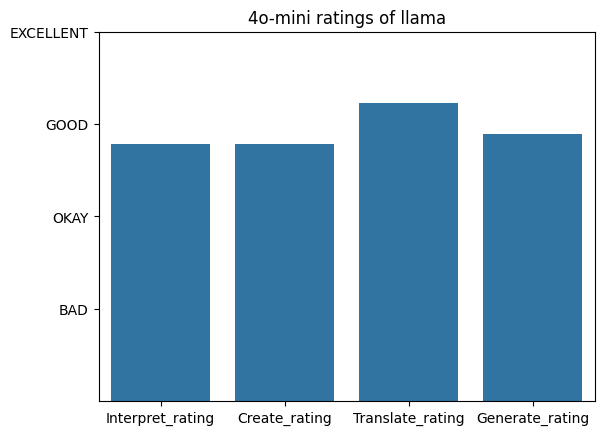

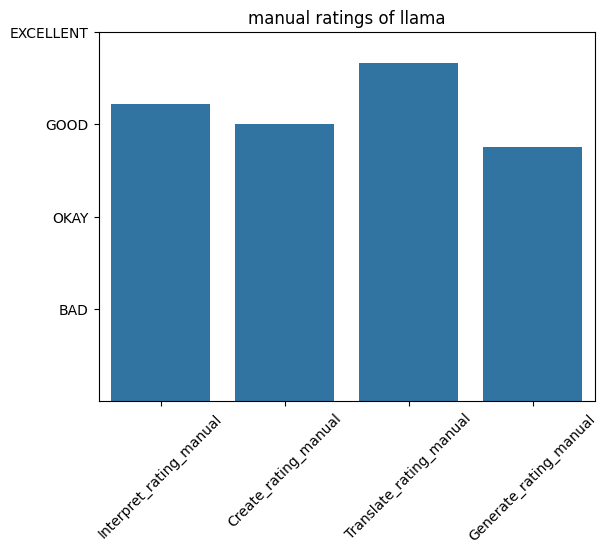

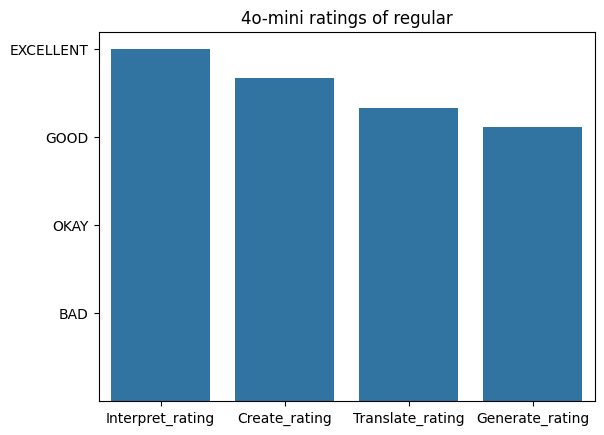

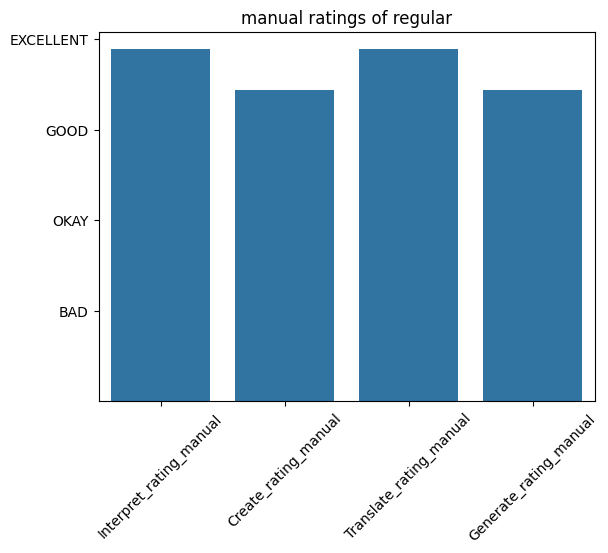

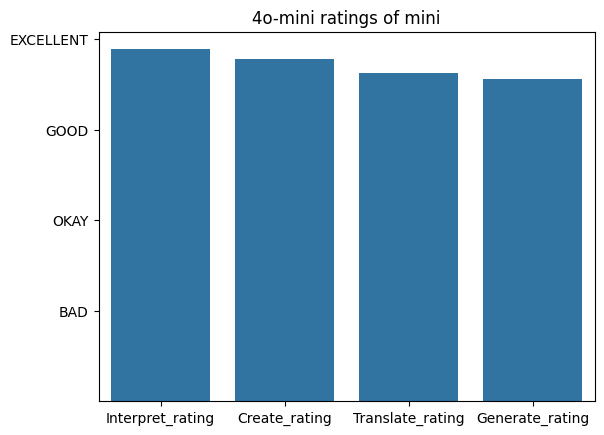

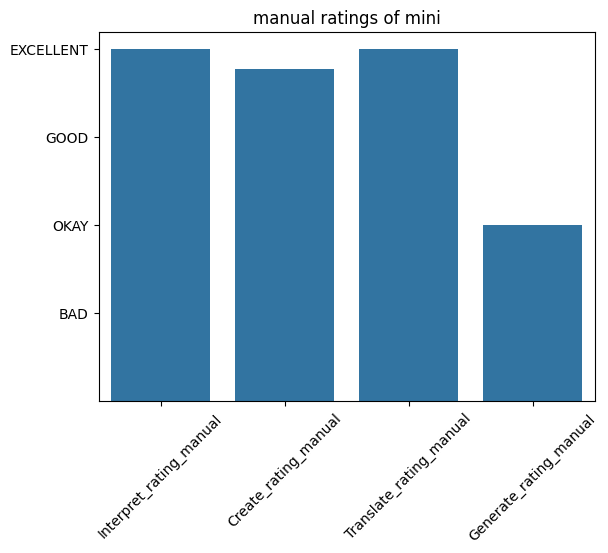

In [34]:
for i, df in enumerate(all_dfs):
    gpt_rating_col = ['Interpret_rating', 'Create_rating', 'Translate_rating', 'Generate_rating']
    manual_rating_col  = [col for col in df.columns if "_manual" in col]

    avg_gpt_rating = df[gpt_rating_col].mean()
    avg_manual_rating = df[manual_rating_col].mean()
    
    plt.figure()
    sns.barplot(data=avg_gpt_rating)
    plt.yticks(ticks=sorted(rating_map.values()), labels=[key for key, _ in sorted(rating_map.items(), key=lambda item: item[1])])
    plt.title(f'4o-mini ratings of {model_names[i]}')
    plt.savefig(f'{model_names[i]}_gpt_ratings.png')

    plt.figure()
    sns.barplot(data=avg_manual_rating)
    plt.yticks(ticks=sorted(rating_map.values()), labels=[key for key, _ in sorted(rating_map.items(), key=lambda item: item[1])])
    plt.xticks(rotation=45)
    plt.title(f'manual ratings of {model_names[i]}')        
    plt.savefig(f'{model_names[i]}_manual_ratings.png')


